In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=82,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=82,
    image_size=(256,256)
)

Found 8020 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
fitted_model = model.fit(train_ds,epochs= 20)

Epoch 1/20
98/98 [==============================] - 533s 4s/step - loss: 0.8909 - accuracy: 0.5884
Epoch 2/20
98/98 [==============================] - 53s 519ms/step - loss: 0.6408 - accuracy: 0.6481
Epoch 3/20
98/98 [==============================] - 54s 531ms/step - loss: 0.5533 - accuracy: 0.7168
Epoch 4/20
98/98 [==============================] - 55s 543ms/step - loss: 0.4831 - accuracy: 0.7631
Epoch 5/20
98/98 [==============================] - 54s 539ms/step - loss: 0.4160 - accuracy: 0.8126
Epoch 6/20
98/98 [==============================] - 55s 547ms/step - loss: 0.3326 - accuracy: 0.8571
Epoch 7/20
98/98 [==============================] - 54s 539ms/step - loss: 0.2538 - accuracy: 0.8985
Epoch 8/20
98/98 [==============================] - 55s 542ms/step - loss: 0.1705 - accuracy: 0.9302
Epoch 9/20
98/98 [==============================] - 55s 549ms/step - loss: 0.1422 - accuracy: 0.9466
Epoch 10/20
98/98 [==============================] - 54s 540ms/step - loss: 0.0920 - accuracy

In [ ]:
results = model.evaluate(validation_ds, verbose=0)

print('Final test set loss: {:.4f}'.format(results[0]))
print('Final test set accuracy: {:2%}'.format(results[1]))

Final test set loss: 1.7460
Final test set accuracy: 73.299998%


In [ ]:
import cv2
import matplotlib.pyplot as plt

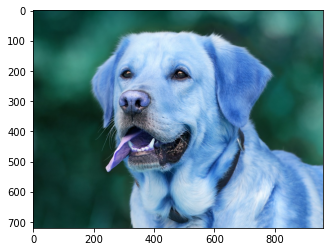

In [ ]:
test_img1 = cv2.imread('/content/drive/MyDrive/single_prediction/cat_or_dog_1.jpg')
plt.imshow(test_img1)

In [ ]:
test_img1 = cv2.resize(test_img1,(256,256))
test_input1 = test_img1.reshape((1,256,256,3))
result1 = model.predict(test_input1)
if result1 == 0:
  print("He's a cat")

else:
  print("He's a dog")

1/1 [==============================] - 0s 467ms/step
He's a dog
